# Opening Parameter Images (.fimg) from PSI Software

This notebook demonstrates how to open binary files containing measurements captured with PSI - Photon Systems Instruments. PSI systems generate parameter images using data from thermal cameras, hyperspectral imaging, or FluoroCam fluorescence imaging. A parameter image is a mathematical result of raw images. These images can contain the average of different measurements, resulting in fluorescence intensity in each pixel or values representing temperatures if the data come from a thermal camera.

For example, the PSI FluorCam generates a parameter image called NDVI.fimg, which represents the Normalized Difference Vegetation Index (NDVI). This image is calculated using the formula:

NDVI = (NIR - RED) / (NIR + RED)

Where NIR (740nm filter) and RED (700 nm filter) correspond to fluorescence measurements in the near-infrared (NIR) and red (RED) spectral bands, respectively. Example files: **FcParamImage_Example_NIR.fimg, FcParamImage_Example_RED.fimg, FcParamImage_Example_NDVI.fimg**

Another typical application of FluoroCam is acquiring chlorophyll fluorescence measurements and calculating parameters such as the quantum yield during steady state (QY_Lss). This tutorial provides an example of how to open this type of file, using files stored in the example_files folder, which contains:

FM images: Chlorophyll fluorescence measurements taken during a saturation pulse of 8000 µmol. **FcParamImage_Example_Fm.fimg**

QY_Lss parameter images: These images represent quantum yield values calculated for each pixel under steady-state light conditions in photosystem II. The QY_Lss values range from 0 to 1. **FcParamImage_Example_QY_max.fimg**

## Please if you use this notebook quote:

Bengoa Luoni, S.A., Garassino, F., Aarts, M.G.M. (2024). A High-Throughput Approach for Photosynthesis Studies in a Brassicaceae Panel. In: Maghuly, F. (eds) Plant Functional Genomics. Methods in Molecular Biology, vol 2787. Humana, New York, NY. https://doi.org/10.1007/978-1-0716-3778-4_2


Jurado-Ruiz, F., Nguyen, T. P., Peller, J., Aranzana, M. J., Polder, G., & Aarts, M. G. M. (2024). LeTra: a leaf tracking workflow based on convolutional neural networks and intersection over union. Plant Methods, 20(1), Article 11. https://doi.org/10.1186/s13007-024-01138-x

In [75]:
#from google.colab import drive

#Conect your gmail drive to the netbook
# drive.mount('/content/drive')


In [76]:
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

file_path = Path('./fimg_files')

# Define a function to read a binary file and convert it into a NumPy array.

The provided methods will also plot the loaded images with `plot_images`.

In [ ]:
def OpenFimg(p):
  with open(p, "rb") as f:
    data = f.read()
    header = np.frombuffer(data[:8], dtype=np.int32)
    #print("Header:", header[0], header[1])
    # Extract the rest of the data as 32-bit floats
    # (Make sure that the remaining byte count is a multiple of 4)
    floats = np.frombuffer(data[8:], dtype=np.float32)
    #print("Floats:", floats)
    image = np.reshape(floats, newshape=(header[1], header[0])) #Image size in pixels
    return image.copy()
  
def get_images(path, label="RED", title="RED", clip_below_zero=False):
  files = list(path.glob(f"*_{label}.fimg"))
  images = {}

  for file in files:
    images[str(file)] = {}
    images[str(file)]["data"] = OpenFimg(file)
    if clip_below_zero:
      images[str(file)]["data"] = np.clip(images[str(file)]["data"], 0, None)

    images[str(file)]["title"] = f"{title} of {file.stem}"
    images[str(file)]["label"] = label
    images[str(file)]["Mean"] = images[str(file)]["data"].mean(),
    images[str(file)]["Min"] = images[str(file)]["data"].min()
    images[str(file)]["Max"] = images[str(file)]["data"].max()
  return images

def plot_images(images):
  for image in images.values():
    plt.figure(figsize=(14, 8))
    img = plt.imshow(image["data"], cmap='inferno', aspect='auto')
    cbar = plt.colorbar(img)
    cbar.set_label("Flc Intensity", fontsize=12)  # Label for colorbar

    # Add titles and labels
    plt.title(f"Heatmap of {image['title']}", fontsize=14)
    plt.xlabel("X-axis", fontsize=12)
    plt.ylabel("Y-axis", fontsize=12)
    plt.axis('off')  # Hide axes
    plt.show()

def plot_histograms(images, bins=100, range=None):
  for image in images.values():
    plt.figure(figsize=(14, 6))
    if range is None:
      range = (image["Min"], image["Max"])
    # Create histogram
    plt.hist(image["data"].flatten(), bins=bins, color='blue', alpha=0.7, range=range)
    plt.title(f"Histogram of {image['title']}", fontsize=14)
    plt.xlabel("Flc Intensity", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid()
    plt.show()




### We open the parameter images RED

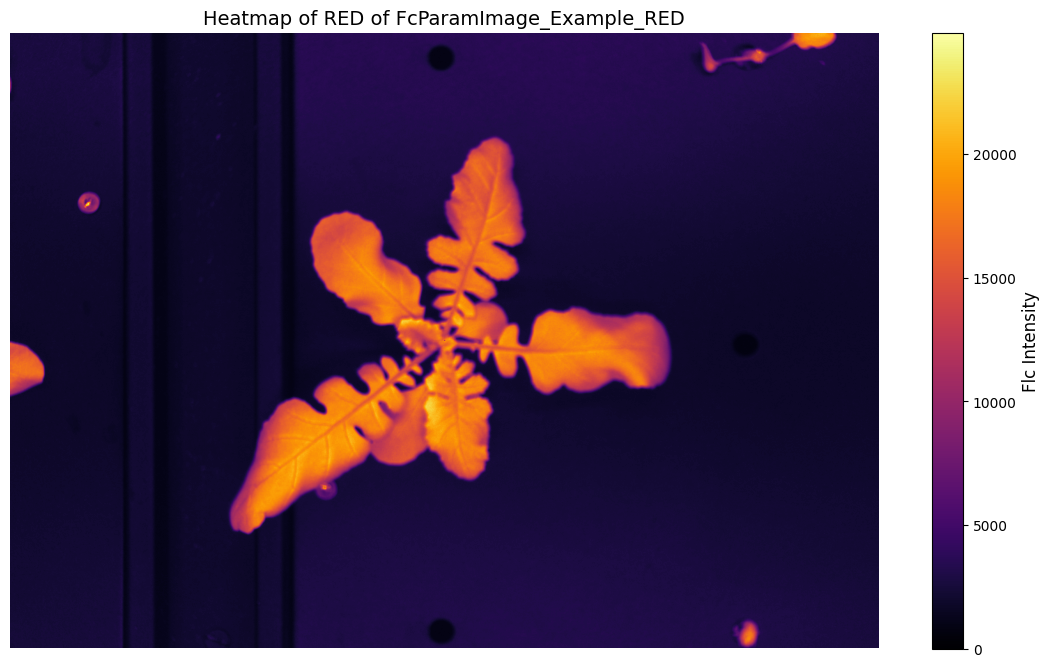

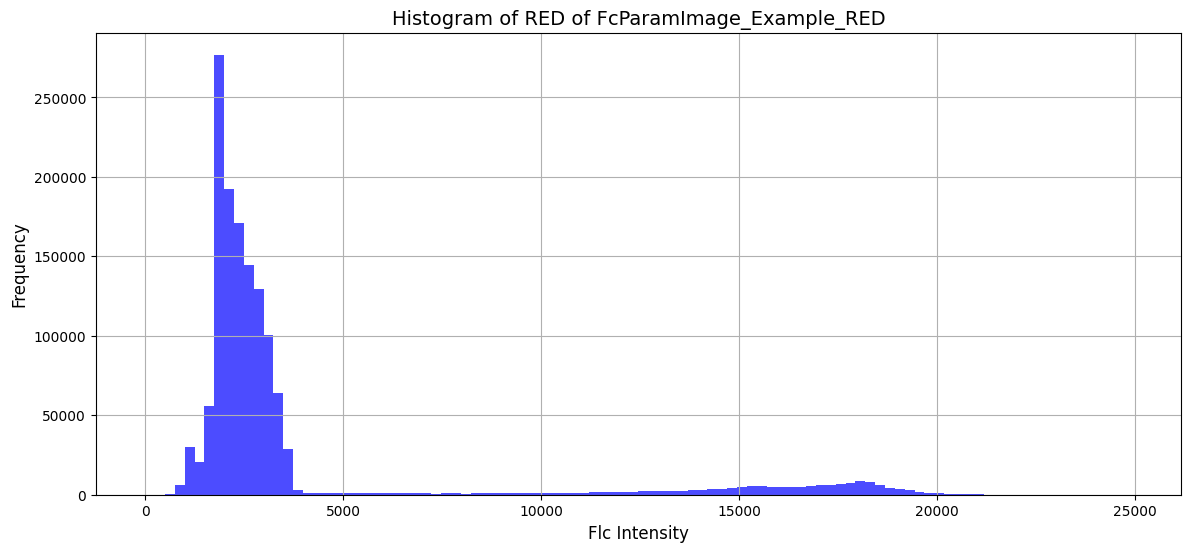

In [78]:
# Now we can visualize our RED data
RED = get_images(file_path, label="RED", title="RED")
plot_images(RED)
plot_histograms(RED)

### We open the parameter images NIR

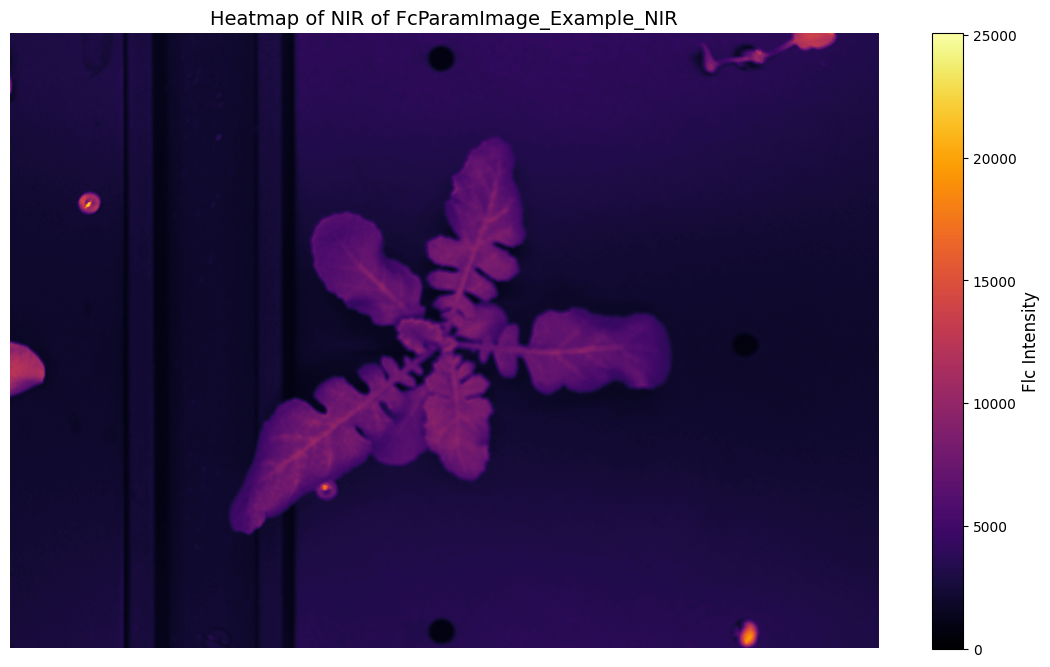

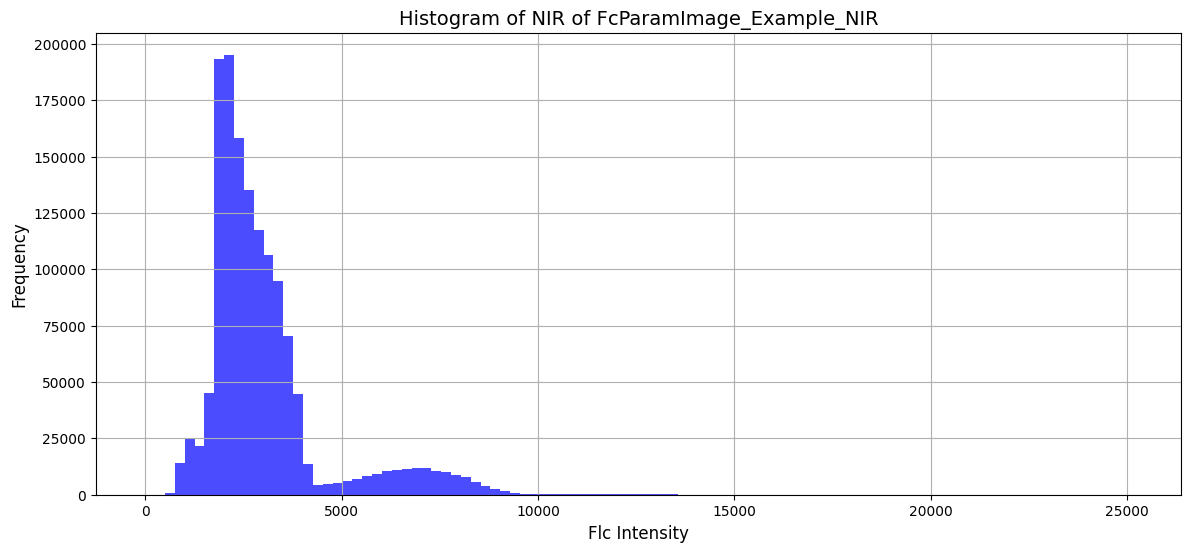

In [79]:
# To open FcParamImage_Example_NIR.fimg, which contains fluorescence data in the red spectrum,
NIR = get_images(file_path, label="NIR", title="NIR")
plot_images(NIR)
plot_histograms(NIR)

### We open the parameter images NDVI

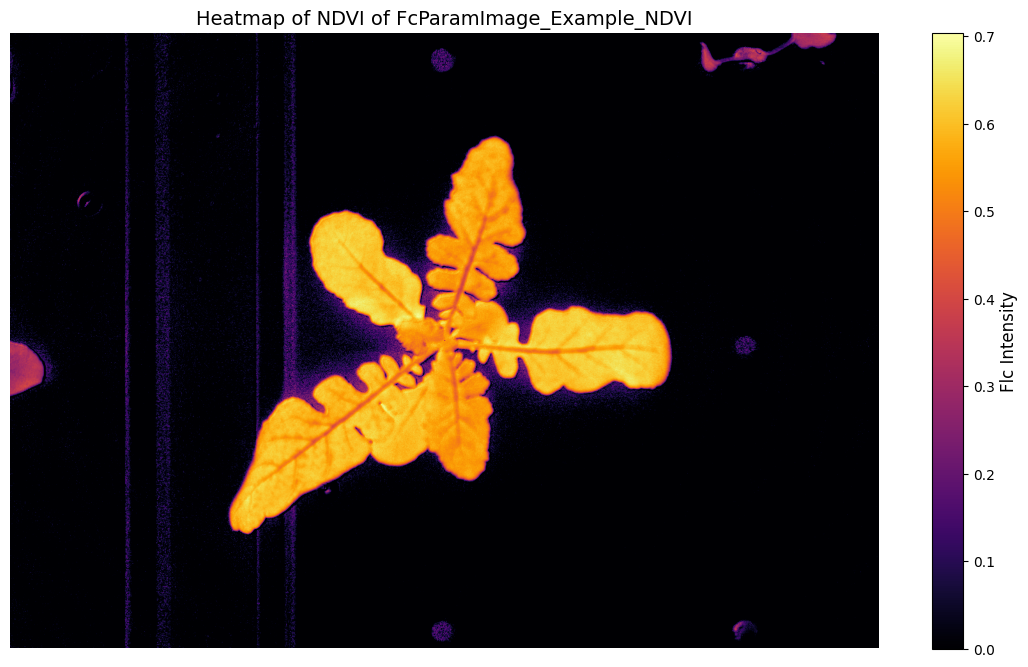

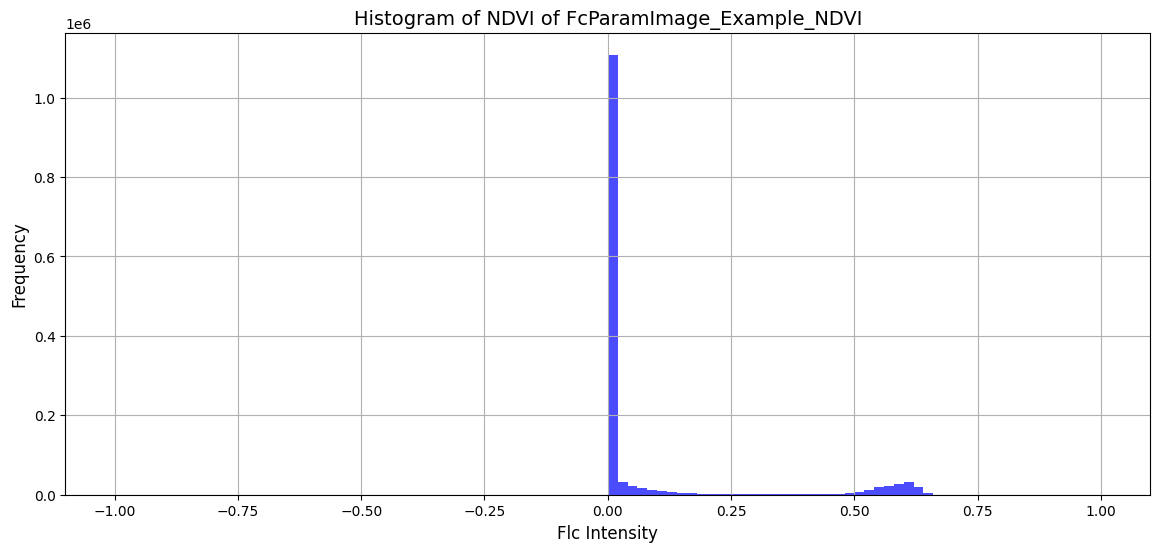

In [80]:
# To open FcParamImage_Example_NDVI.fimg, which contains fluorescence data in the red spectrum,
NDVI = get_images(file_path, label="NDVI", title="NDVI")
plot_images(NDVI)
plot_histograms(NDVI, range=(-1, 1))

### We open the parameter images FM

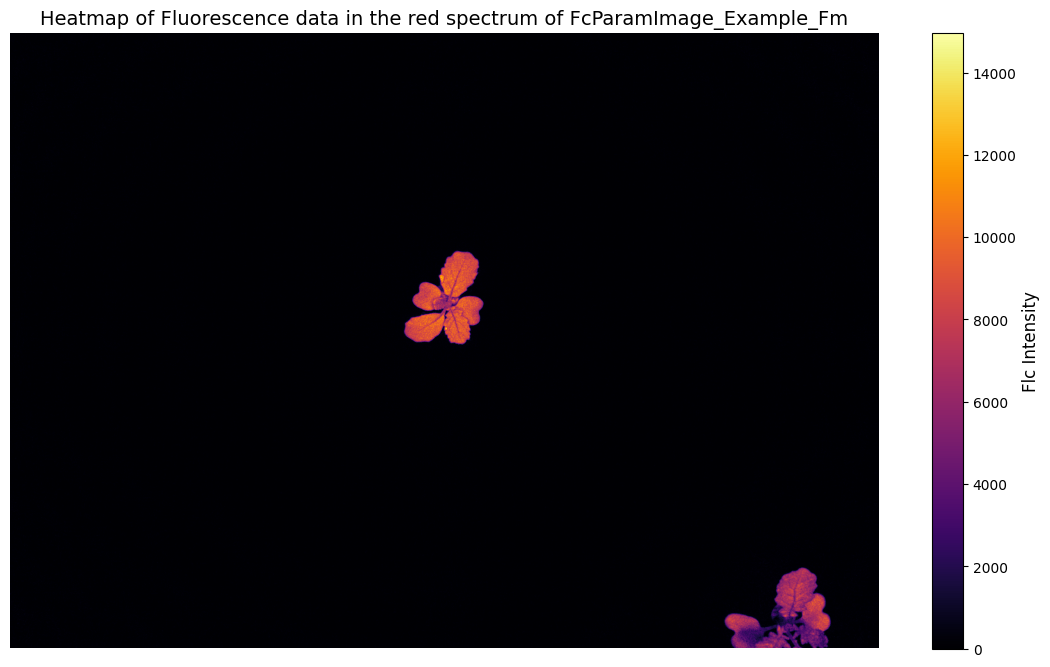

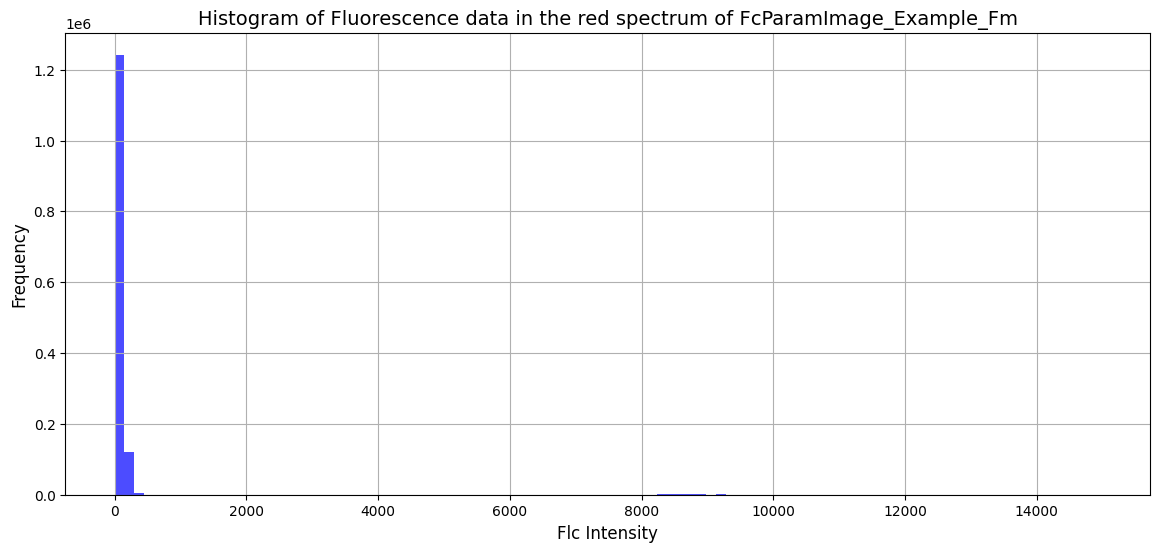

In [81]:
# To open FcParamImage_Example_FM.fimg, which contains fluorescence data in the red spectrum,
FM = get_images(file_path, label="FM", title="Fluorescence data in the red spectrum")
plot_images(FM)
plot_histograms(FM)

### We open the parameter images QY_Lss

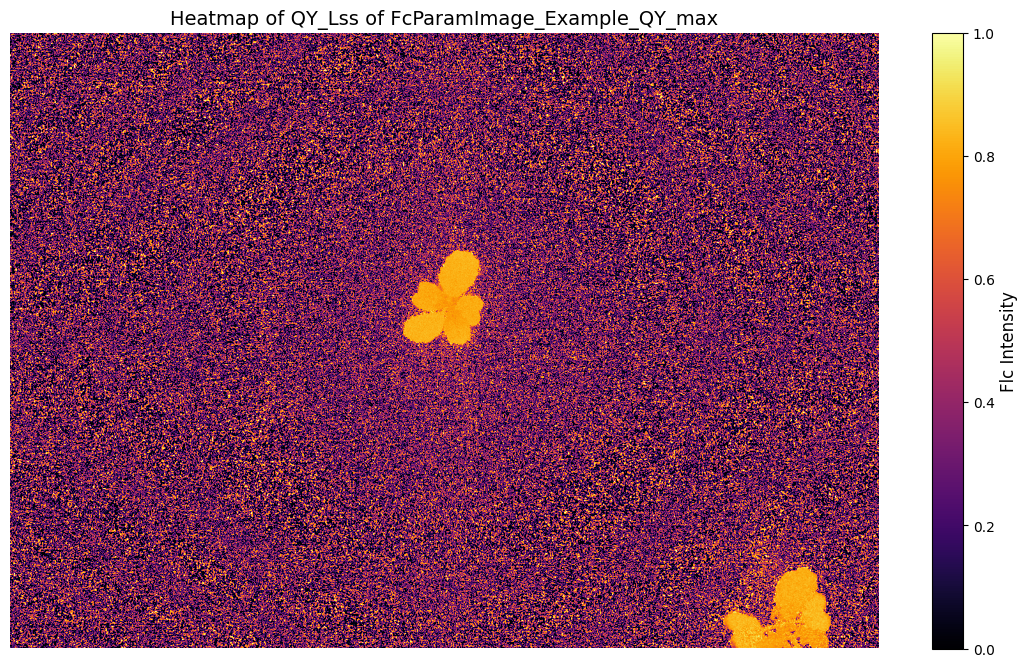

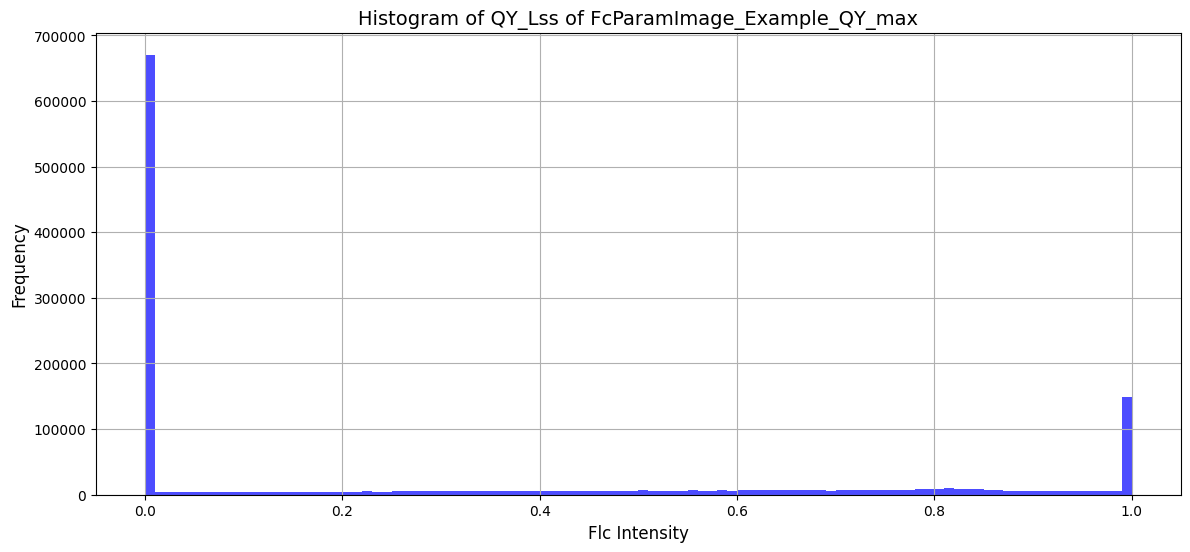

In [82]:
#This example is more complex because QY_Lss is calculated as (Fm - F0) / Fm.
#This type of calculation can produce negative values in the background.
QY_Lss = get_images(file_path, label="QY_max", title="QY_Lss", clip_below_zero=True)
plot_images(QY_Lss)
plot_histograms(QY_Lss)
# To open FcParamImage_Example_Fm.fimg, which contains fluorescence data in the red spectrum,

In [83]:
RED_df = pd.DataFrame.from_dict(RED, orient="index")
NIR_df = pd.DataFrame.from_dict(NIR, orient="index")
FM_df = pd.DataFrame.from_dict(FM, orient="index")
NDVI_df = pd.DataFrame.from_dict(NDVI, orient="index")
QY_Lss_df = pd.DataFrame.from_dict(QY_Lss, orient="index")

combined_df = pd.concat([RED_df, NIR_df, FM_df, NDVI_df, QY_Lss_df], keys=["RED", "NIR", "FM", "NDVI", "QY_Lss"])

display(combined_df)


data  \
RED    fimg_files\FcParamImage_Example_RED.fimg     [[2665.5, 2622.5, 2853.25, 2746.75, 2736.375, ...   
NIR    fimg_files\FcParamImage_Example_NIR.fimg     [[3000.625, 2953.375, 2745.625, 2712.75, 3021....   
FM     fimg_files\FcParamImage_Example_Fm.fimg      [[9.666667, 19.666666, 187.0, 42.333332, 252.6...   
NDVI   fimg_files\FcParamImage_Example_NDVI.fimg    [[0.0, 0.0, 0.037720144, 0.012378265, 0.0, 0.0...   
QY_Lss fimg_files\FcParamImage_Example_QY_max.fimg  [[0.0, 1.0, 1.0, 0.0, 0.7994723, 0.3785211, 0....   

                                                                                                title  \
RED    fimg_files\FcParamImage_Example_RED.fimg                       RED of FcParamImage_Example_RED   
NIR    fimg_files\FcParamImage_Example_NIR.fimg                       NIR of FcParamImage_Example_NIR   
FM     fimg_files\FcParamImage_Example_Fm.fimg      Fluorescence data in the red spectrum of FcPar...   
NDVI   fimg_files\FcParamImage_Example_NDVI.fimg                    NDVI of FcParamImage_Example_NDVI   
QY_Lss fimg_files\FcParamImage_Example_QY_max.fimg              QY_Lss of FcParamImage_Example_QY_max   

                                                     label           Mean  \
RED    fimg_files\FcParamImage_Example_RED.fimg        RED    (3896.905,)   
NIR    fimg_files\FcParamImage_Example_NIR.fimg        NIR   (3035.4124,)   
FM     fimg_files\FcParamImage_Example_Fm.fimg          FM   (181.49278,)   
NDVI   fimg_files\FcParamImage_Example_NDVI.fimg      NDVI  (0.07355004,)   
QY_Lss fimg_files\FcParamImage_Example_QY_max.fimg  QY_max  (0.33120078,)   

                                                    Min           Max  
RED    fimg_files\FcParamImage_Example_RED.fimg     0.0  24918.875000  
NIR    fimg_files\FcParamImage_Example_NIR.fimg     0.0  25108.625000  
FM     fimg_files\FcParamImage_Example_Fm.fimg      0.0  14975.333008  
NDVI   fimg_files\FcParamImage_Example_NDVI.fimg    0.0      0.704043  
QY_Lss fimg_files\FcParamImage_Example_QY_max.fimg  0.0      1.000000